# Self-Organizing Map

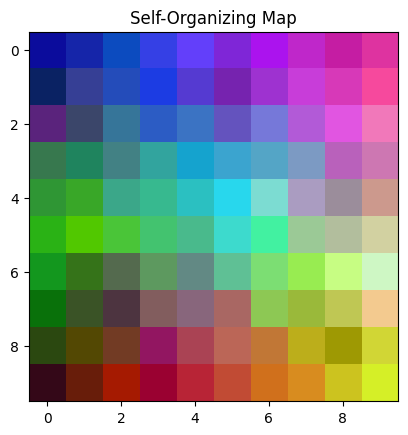

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class SelfOrganizingMap:
    def __init__(self, input_dim, grid_size, learning_rate=0.1, radius=None, epochs=1000):
        self.input_dim = input_dim
        self.grid_size = grid_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.radius = radius if radius else max(grid_size) / 2
        self.weights = np.random.rand(grid_size[0], grid_size[1], input_dim)

    def find_bmu(self, sample):
        """Find the Best Matching Unit (BMU) for a given sample."""
        distances = np.linalg.norm(self.weights - sample, axis=2)
        return np.unravel_index(np.argmin(distances), distances.shape)

    def update_weights(self, sample, bmu, iteration):
        """Update weights of the SOM based on competitive learning."""
        for i in range(self.grid_size[0]):
            for j in range(self.grid_size[1]):
                dist_to_bmu = np.linalg.norm(np.array([i, j]) - np.array(bmu))
                if dist_to_bmu <= self.radius:
                    influence = np.exp(-dist_to_bmu**2 / (2 * (self.radius**2)))
                    self.weights[i, j] += self.learning_rate * influence * (sample - self.weights[i, j])

    def train(self, data):
        """Train the SOM using competitive learning."""
        for epoch in range(self.epochs):
            for sample in data:
                bmu = self.find_bmu(sample)
                self.update_weights(sample, bmu, epoch)
            # Decay learning rate and radius
            self.learning_rate *= 0.995
            self.radius *= 0.995

    def visualize(self):
        """Visualize the trained SOM weight map."""
        plt.imshow(self.weights.reshape(self.grid_size[0], self.grid_size[1], self.input_dim))
        plt.title("Self-Organizing Map")
        plt.show()

# Example usage
if __name__ == "__main__":
    # Generate random 2D data
    data = np.random.rand(100, 3) # 100 samples, 3 features
    som = SelfOrganizingMap(input_dim=3, grid_size=(10, 10))
    som.train(data)
    som.visualize()

# Backpropagation through Time for Recurrent Networks

In [2]:
import numpy as np

def sig(x):
    return 1 / (1 + np.exp(-x))

def sig_deriv(x):
    return x * (1 - x)

class RNN:
    def __init__(self, in_size, hid_size, out_size, lr=0.1):
        self.in_size = in_size
        self.hid_size = hid_size
        self.out_size = out_size
        self.lr = lr
        
        self.w_ih = np.random.rand(in_size, hid_size)
        self.w_ho = np.random.rand(hid_size, out_size)
        self.w_hh = np.random.rand(hid_size, hid_size)
        
    def train(self, X, y, epochs=50):
        h = np.zeros((1, self.hid_size))
        
        for e in range(epochs):
            loss = 0
            
            for i in range(len(X)):
                h_in = np.dot(X[i], self.w_ih) + np.dot(h, self.w_hh)
                h = sig(h_in)
                out = sig(np.dot(h, self.w_ho))
                
                err = y[i] - out
                loss += np.mean(np.abs(err))
                
                d_out = err * sig_deriv(out)
                d_h = d_out.dot(self.w_ho.T) * sig_deriv(h)
                
                self.w_ho += h.T.dot(d_out) * self.lr
                self.w_ih += X[i].reshape(-1, 1).dot(d_h) * self.lr
                self.w_hh += h.T.dot(d_h) * self.lr
            
            if e % 10 == 0:
                print(f"Epoch {e}, Loss: {loss:.4f}")

if __name__ == "__main__":
    np.random.seed(42)
    X = np.random.rand(100, 2)
    y = np.random.rand(100, 1)
    
    rnn = RNN(in_size=2, hid_size=4, out_size=1)
    rnn.train(X, y, epochs=50)

Epoch 0, Loss: 28.0617
Epoch 10, Loss: 25.4173
Epoch 20, Loss: 25.4168
Epoch 30, Loss: 25.4163
Epoch 40, Loss: 25.4157
